<a href="https://colab.research.google.com/github/Harshu1306/iiit-hyderabad-internship/blob/main/finaltask(iiit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Unzip images to a custom data folder
!unzip -q "/content/plant disesase.v2i.yolov8.zip" -d "/content/custom_data"


replace /content/custom_data/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install ultralytics

In [ ]:
import yaml

data_yaml = {
    'train': '/content/custom_data/train/images',
    'val': '/content/custom_data/valid/images',
    'test': '/content/custom_data/test/images',  # optional
    'nc': 3,  # change this to your number of classes
    'names': ['healthy', 'powdery_mildew', 'rust']  # replace with your classes
}

with open('/content/data.yaml', 'w') as f:
    yaml.dump(data_yaml, f, sort_keys=False)

print("✅ Created /content/data.yaml")


✅ Created /content/data.yaml


In [ ]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):
    # Check if classes.txt exists
    if not os.path.exists(path_to_classes_txt):
        print(f'❌ classes.txt file not found at {path_to_classes_txt}')
        return

    # Read class names
    with open(path_to_classes_txt, 'r') as f:
        classes = [line.strip() for line in f if line.strip()]
    number_of_classes = len(classes)

    # Construct data.yaml dictionary with full absolute paths
    data = {
        'train': '/content/custom_data/train/images',
        'val': '/content/custom_data/valid/images',
        'nc': number_of_classes,
        'names': classes
    }

    # Write to YAML file
    with open(path_to_data_yaml, 'w') as f:
        yaml.dump(data, f, sort_keys=False)

    print(f'✅ Created data.yaml at {path_to_data_yaml}')


In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profil

In [ ]:
!yolo detect predict model=runs/detect/train3/weights/best.pt source=/content/custom_data/valid/images save=True

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/34 /content/custom_data/valid/images/818a15d52bb75f0e_jpg.rf.9cd15399b7aa3e0912e55b844ba0414f.jpg: 448x640 1 healthy, 384.3ms
image 2/34 /content/custom_data/valid/images/81c36e378473c93e_jpg.rf.1040c252a196b484eb1fcc5c958a7ef3.jpg: 448x640 2 healthys, 365.8ms
image 3/34 /content/custom_data/valid/images/828fc0dc4fe230f7_jpg.rf.1801819c9d6e813feaa58c00645d16e1.jpg: 448x640 2 healthys, 346.3ms
image 4/34 /content/custom_data/valid/images/82aeb5e4582fb2aa_jpg.rf.dc486598d5fa42e68f5ea5bac5630f1f.jpg: 480x640 5 healthys, 403.2ms
image 5/34 /content/custom_data/valid/images/82dc2fe996bd420b_jpg.rf.c941fa23bb32fec4c91f660053fb5212.jpg: 448x640 3 healthys, 350.1ms
image 6/34 /content/custom_data/valid/images/830f26cc6d3cd13e_jpg.rf.8c8e1acbd904a3222f4235465955acf8.jpg: 448x640 2 healthys, 1 rust, 431.1ms
image 7/34 /conten

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [ ]:
from ultralytics import YOLO

# Load your trained model (change path if needed)
model = YOLO('/content/runs/detect/train3/weights/best.pt')

# Run validation
metrics = model.val()

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1738.1±877.7 MB/s, size: 859.3 KB)


val: Scanning /content/custom_data/valid/labels.cache... 34 images, 0 backgrounds, 12 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]

val: /content/custom_data/valid/images/81c36e378473c93e_jpg.rf.1040c252a196b484eb1fcc5c958a7ef3.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 3. Possible class labels are 0-2
val: /content/custom_data/valid/images/830f26cc6d3cd13e_jpg.rf.8c8e1acbd904a3222f4235465955acf8.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 3. Possible class labels are 0-2
val: /content/custom_data/valid/images/83ac2ccacb0fd2b9_jpg.rf.1e52255964977760ea49759cbc8e92ff.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 3. Possible class labels are 0-2
val: /content/custom_data/valid/images/84c3f037e53e66a1_jpg.rf.339e28f6f47dd7c5bfcc6c699bac275d.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 3. Possible class labels are 0-2
val: /content/custom_data/valid/images/85c232ef5da06ab9_jpg.rf.002f2bcd48f84eaaade23d255d990c01.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 3. 


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.52s/it]


                   all         22         22      0.937       0.41      0.523      0.211
               healthy         17         17      0.874       0.82      0.832      0.286
                  rust          5          5          1          0      0.214      0.136
Speed: 3.7ms preprocess, 532.4ms inference, 0.0ms loss, 47.3ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# Automatically creates and saves precision, recall, confusion matrix, F1, and more
model.val(save=True)


Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2873.5±197.0 MB/s, size: 747.6 KB)


val: Scanning /content/custom_data/valid/labels.cache... 34 images, 0 backgrounds, 12 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]

val: /content/custom_data/valid/images/81c36e378473c93e_jpg.rf.1040c252a196b484eb1fcc5c958a7ef3.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 3. Possible class labels are 0-2
val: /content/custom_data/valid/images/830f26cc6d3cd13e_jpg.rf.8c8e1acbd904a3222f4235465955acf8.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 3. Possible class labels are 0-2
val: /content/custom_data/valid/images/83ac2ccacb0fd2b9_jpg.rf.1e52255964977760ea49759cbc8e92ff.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 3. Possible class labels are 0-2
val: /content/custom_data/valid/images/84c3f037e53e66a1_jpg.rf.339e28f6f47dd7c5bfcc6c699bac275d.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 3. Possible class labels are 0-2
val: /content/custom_data/valid/images/85c232ef5da06ab9_jpg.rf.002f2bcd48f84eaaade23d255d990c01.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 3. 


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.91s/it]


                   all         22         22      0.937       0.41      0.523      0.211
               healthy         17         17      0.874       0.82      0.832      0.286
                  rust          5          5          1          0      0.214      0.136
Speed: 3.5ms preprocess, 483.4ms inference, 0.0ms loss, 57.2ms postprocess per image
Results saved to runs/detect/val3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x781308e04e10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

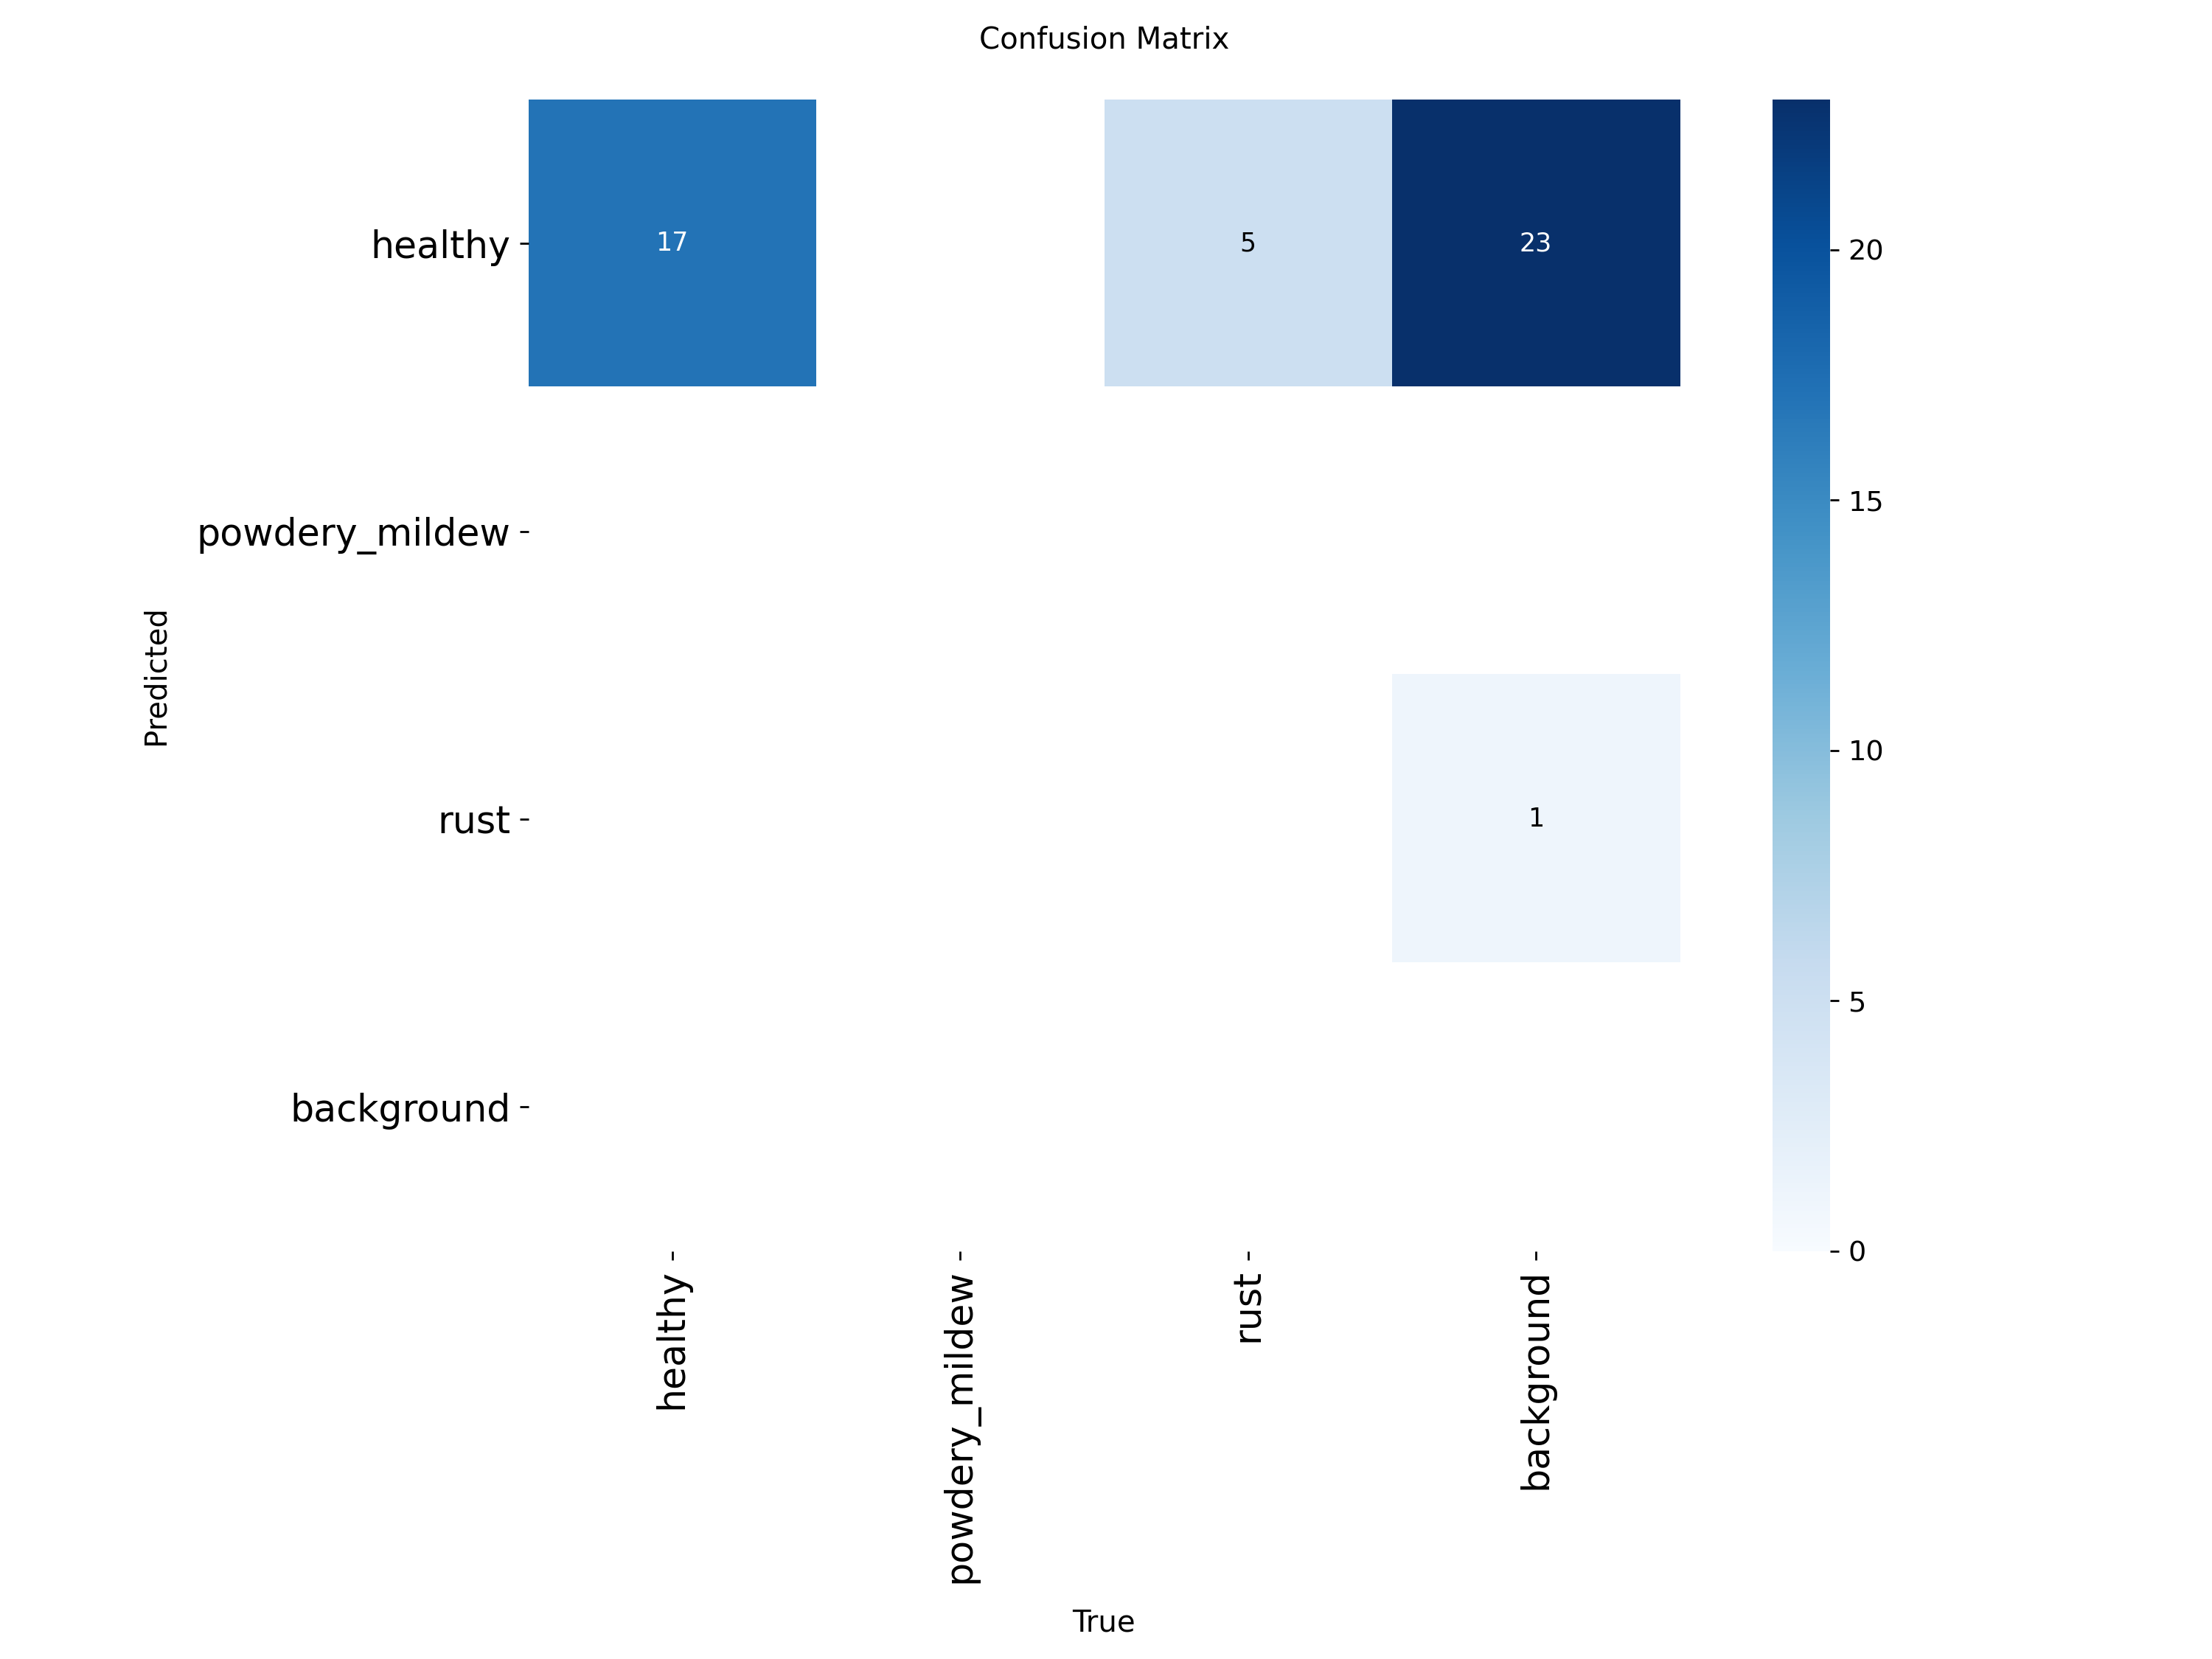

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/val/confusion_matrix.png'))


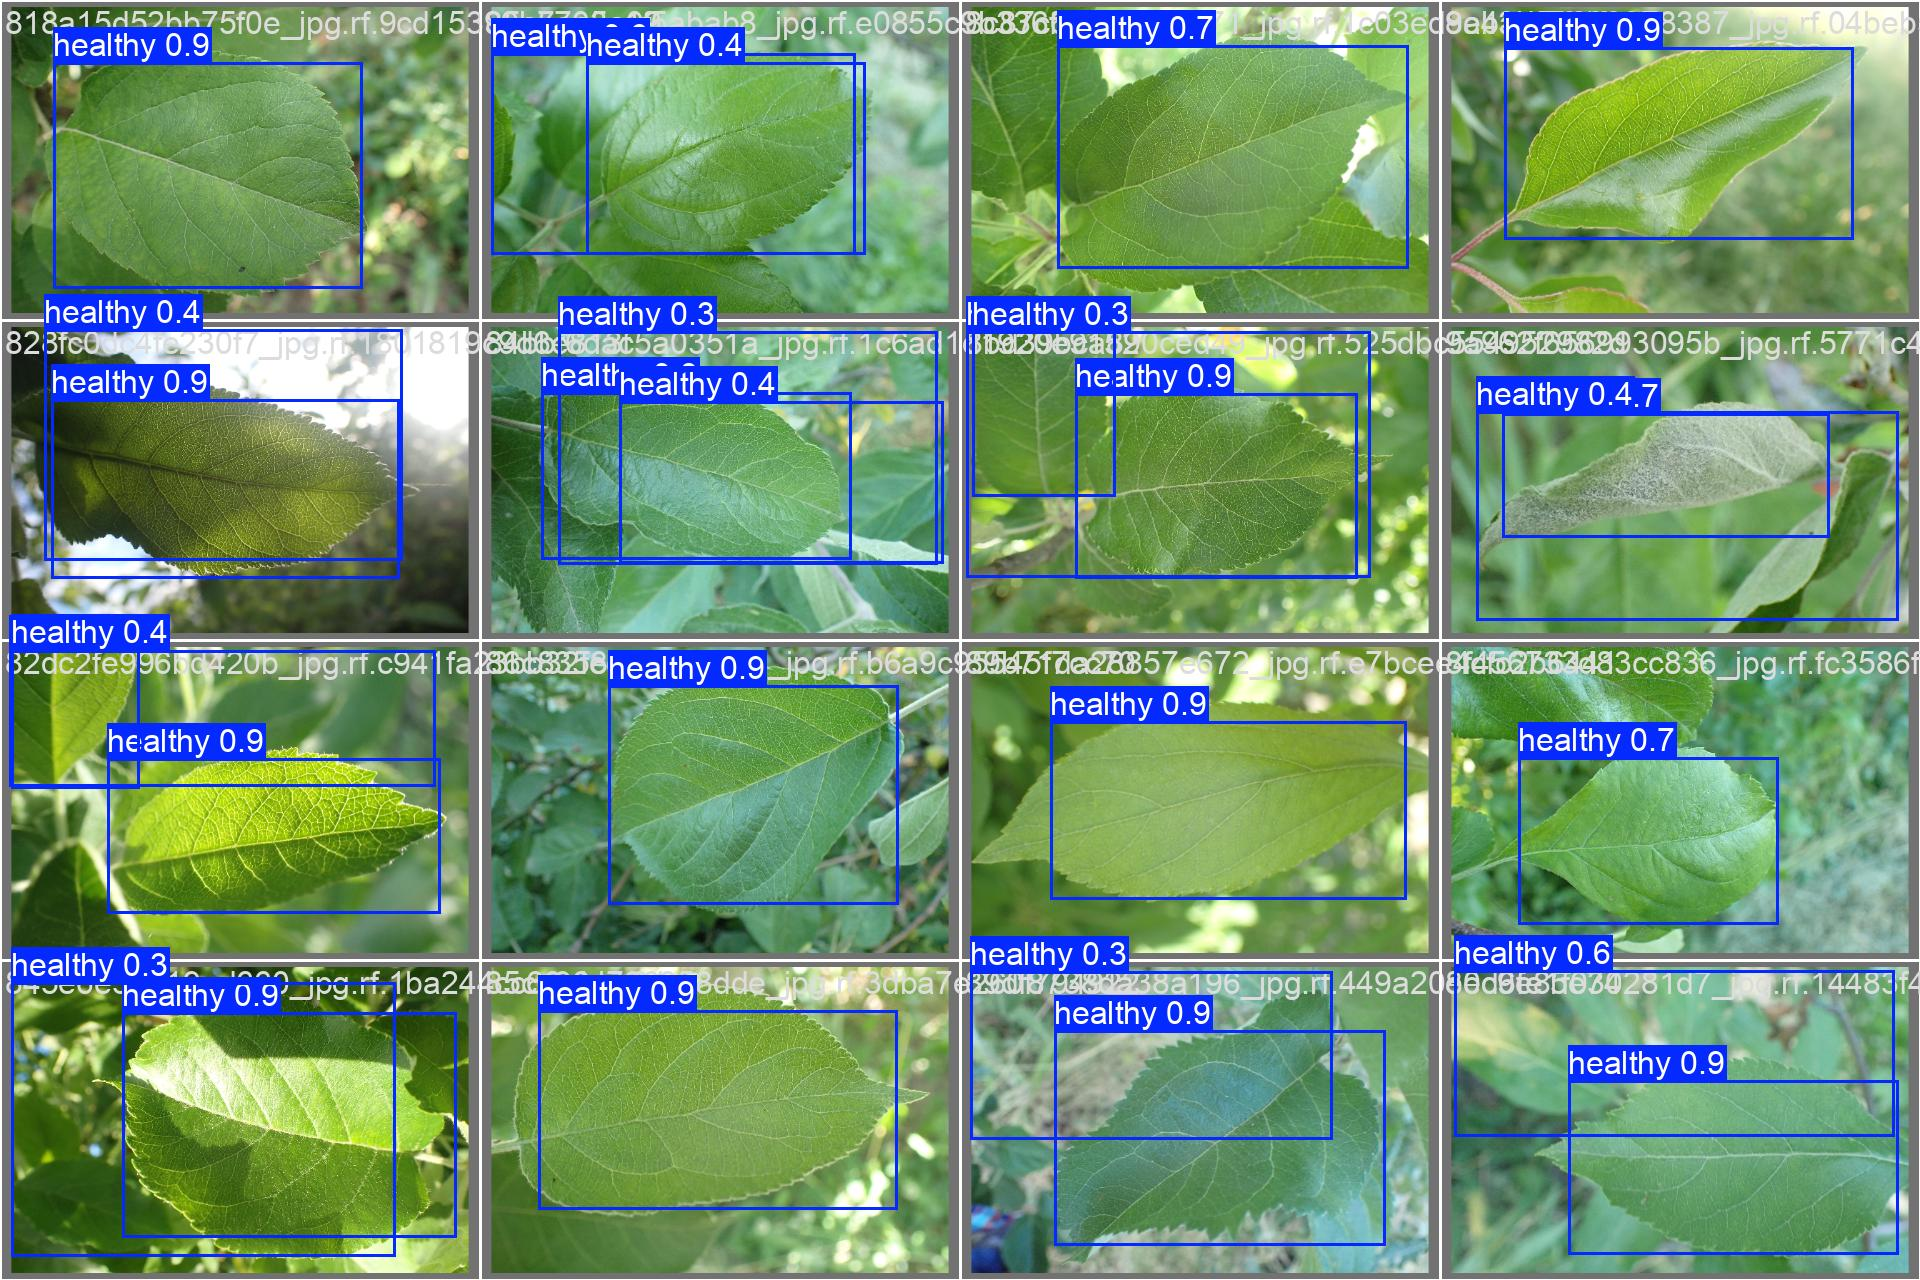

In [ ]:
display(Image(filename='/content/runs/detect/val/val_batch0_pred.jpg'))  # Sample predictions

